In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_regression
from tqdm import tqdm
from itertools import combinations,product

# Como máquinas aprendem
___

In [2]:
x,y = make_regression(n_samples=100,n_features=1,noise=30,bias=200,random_state=42)
x = x.squeeze()

Vamos verificar os dados

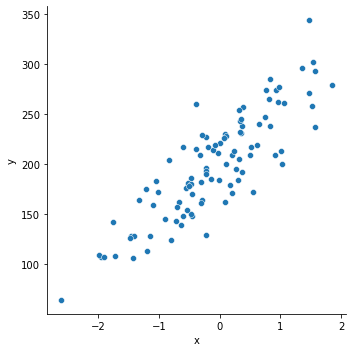

In [3]:
g = sns.relplot(x=x,y=y)
g.set(xlabel='x',ylabel='y')
plt.show()

In [4]:
np.corrcoef(x,y)

array([[1.       , 0.8617813],
       [0.8617813, 1.       ]])

<AxesSubplot:>

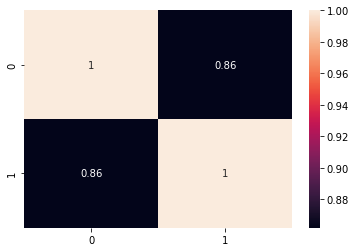

In [5]:
sns.heatmap(np.corrcoef(x,y),annot=True)

Será que conseguimos criar uma regra que para cada X podemos prever um Y? Podemos tentar chutar pela média.

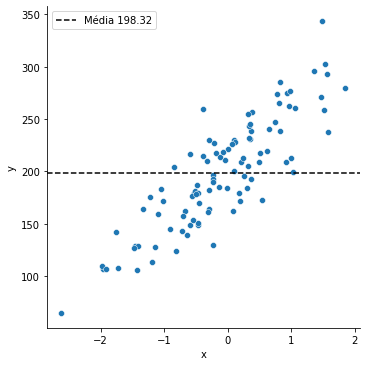

In [5]:
g = sns.relplot(x=x,y=y)
plt.axhline(y=y.mean(),color='black',ls='--',label=f'Média {round(y.mean(),2)}')
g.set(xlabel='x',ylabel='y')
plt.legend()
plt.show()

Chutando pela média temos que, independente do valor de X, o valor de Y sempre vai ser o mesmo : a média. Podemos criar uma forma de avaliar o quanto acertamos?

In [6]:
def medir_resultado(real,predito):
    return np.mean((real-predito)**2)

In [7]:
## criando valor predito
predito = np.array([np.mean(y) for _ in range(len(y))])

In [10]:
## medindo o resultado
medir_resultado(y,predito)

2729.8802594847116

Sabemos que a equação da reta é 

> y = A*x + B

Será que podemos criar uma combinação de A e B que diminuam ao máximo o erro?

In [11]:
def predict(x,beta,intercept):
    return (x*beta) + intercept

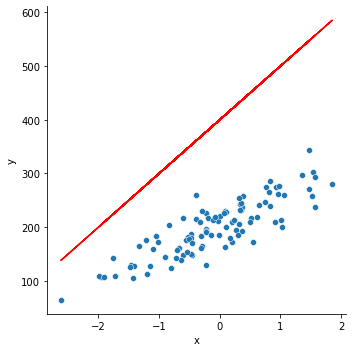

In [17]:
g = sns.relplot(x=x,y=y)
plt.plot(x,predict(x,100,400),color='r')
g.set(xlabel='x',ylabel='y')
plt.show()

In [18]:
medir_resultado(y,predict(x,100,400))

39351.37976129991

In [19]:
2729.8802594847116 < 39351.37976129991

True

Então a regra :

> y = 100*x+400

É melhor que chutar sempre pela média. Então qual é a melhor combinação de valores de beta e coef_ para minimizar o erro?

In [24]:
pesos = np.arange(-500,500).tolist()
coefs = np.arange(100,200).tolist()

In [27]:
combinacoes = product(pesos,coefs)
resultados = []

for peso,coef in tqdm(combinacoes):
    predito = predict(x,beta=peso,intercept=coef)
    resultado = medir_resultado(y,predito)
    resultados.append(resultado)
else:
    resultados = np.array(resultados)

100000it [00:01, 82416.11it/s]


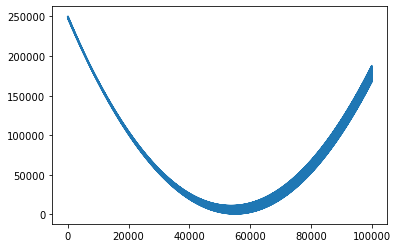

In [28]:
plt.plot(resultados)

In [29]:
## o menor erro
resultados.min()

722.4910859446006

In [31]:
## o índice do menor erro
resultados.argmin()

54999

O índice do menor erro é 54999, logo a melhor combinação deve ser a 54999 combinação.

In [32]:
melhor = list(product(pesos,coefs))[54999]
melhor

(49, 199)

Logo, o melhor beta é 49 e o melhor coef é 199

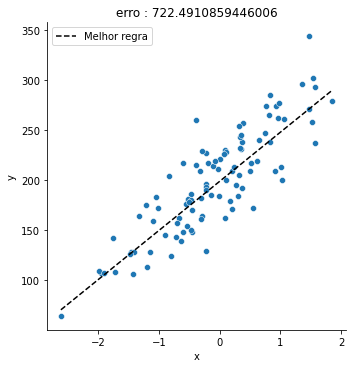

In [30]:
g = sns.relplot(x=x,y=y)
g.set(xlabel='x',ylabel='y',title=f'erro : {medir_resultado(y,predict(x,49,199))}')
sns.lineplot(x=x,y=predict(x,49,199),color='black',ls='--',label=f'Melhor regra')
plt.legend()
plt.show()

In [32]:
predict(12,49,199)

787